In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv('EMERGENCIAs_2021_2024.csv')
df = pd.read_csv('/kaggle/input/emergencias-21-24-hospitalgraldrviniciocalventi/EMERGENCIAs_2021_2024.csv')

df.head()

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
0,01/07/2021,Dominicana,21,Masculino,Traumas Generales,Trauma En Ojo Izq,Estabilizados Y Despachados,911
1,01/07/2021,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,01/07/2021,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,01/07/2021,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,01/07/2021,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911


In [3]:
df['edad'].unique()

array(['21', '51', '57', '35', '70', '16', '26', '74', '77', '17', '24',
       '1', '19', '34', '48', '84', '65', '42', '9', '20', '39', '31',
       '69', '68', '59', '55', '37', '56', '15', '46', '23', '45', '28',
       '32', '33', '27', '40', '4', '41', '25', '49', '2', '30', '63',
       '18', '54', '29', '22', '82', '38', '58', '79', '52', '66', '47',
       '44', '6', '-1', '13', '3', '7', '11', '12', '81', '67', '50',
       '72', '80', '71', '64', '88', '53', '60', '43', '36', '14', '73',
       '75', '5', '10', '8', '86', '61', '90', '96', '78', '62', '95',
       '93', '89', '76', '94', '101', '83', '85', '87', '92', '5m', '110',
       '98', '91', '567', '29*', '103', '0', '2 1', '-11', '100', '106',
       '99', '97', '-2', '174', 'N/D', '-12', '-4', '-9', '-5', '-14',
       '102', '188', '104', nan, '500', 26, 33, 61, 22, 28, 21, 55, 18,
       101, 19, 46, 17, 24, 48, 34, 15, 62, 32, 2, 1, 6, 7, 10, 11, 12,
       13, 3, 8, 4, -1, 5, 14, 16, 25, 45, 29, 31, 30, 36, 27,

### Primero limpiemos los datos

In [4]:
df.query( "edad == '5m'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
3037,19/07/2021,Dominicana,5m,Masculino,Otros,Desidratacion,Estabilizados Y Despachados,911


In [5]:
df.loc[3037, "edad"] = 5

In [6]:
df.query( "edad == 'N/D'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
44565,01/04/2022,Dominicana,N/D,Masculino,Otros,Herida Labio Sup,Estabilizados Y Despachados,Cirugia General
44573,01/04/2022,Dominicana,N/D,Masculino,Otros,Hx 5dedo Mano Izq,Estabilizados Y Despachados,Cirugia General
44611,01/04/2022,Dominicana,N/D,Femenino,Traumas Generales,Trauma Craneal,Estabilizados Y Despachados,Cirugia General
44618,01/04/2022,Dominicana,N/D,Femenino,Traumas Generales,Trauma Rodilla Derecha,Estabilizados Y Despachados,Cirugia General
44619,01/04/2022,Dominicana,N/D,Masculino,Traumas Generales,Trauma Rodilla Izq,Estabilizados Y Despachados,Cirugia General
52192,20/05/2022,Dominicana,N/D,Femenino,Otros,Tea,Estabilizados Y Despachados,Med Interna
92288,08/06/2023,Dominicana,N/D,Masculino,Otros,Congestion Nasal,Estabilizados Y Despachados,Pediatria
92298,08/06/2023,Dominicana,N/D,Masculino,Otros,Odontargia,Estabilizados Y Despachados,Pediatria


In [7]:
# df['edad'] = df['edad'].replace("N/D", pd.NA)

# Drop rows where 'edad' is 'N/D'
df = df[df['edad'] != 'N/D']

In [8]:
df.query( "edad == 'N/D'") 

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad


In [9]:
df['edad'].unique()

array(['21', '51', '57', '35', '70', '16', '26', '74', '77', '17', '24',
       '1', '19', '34', '48', '84', '65', '42', '9', '20', '39', '31',
       '69', '68', '59', '55', '37', '56', '15', '46', '23', '45', '28',
       '32', '33', '27', '40', '4', '41', '25', '49', '2', '30', '63',
       '18', '54', '29', '22', '82', '38', '58', '79', '52', '66', '47',
       '44', '6', '-1', '13', '3', '7', '11', '12', '81', '67', '50',
       '72', '80', '71', '64', '88', '53', '60', '43', '36', '14', '73',
       '75', '5', '10', '8', '86', '61', '90', '96', '78', '62', '95',
       '93', '89', '76', '94', '101', '83', '85', '87', '92', 5, '110',
       '98', '91', '567', '29*', '103', '0', '2 1', '-11', '100', '106',
       '99', '97', '-2', '174', '-12', '-4', '-9', '-5', '-14', '102',
       '188', '104', nan, '500', 26, 33, 61, 22, 28, 21, 55, 18, 101, 19,
       46, 17, 24, 48, 34, 15, 62, 32, 2, 1, 6, 7, 10, 11, 12, 13, 3, 8,
       4, -1, 14, 16, 25, 45, 29, 31, 30, 36, 27, 38, 37, 69, 

In [10]:
df.query( "edad == '29*'")


,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
9257,22/08/2021,Dominicana,29*,Femenino,Emergencia Obstétrica,Embarazo,Hospitalizados,Ginecologia


In [11]:
df.loc[9257, "edad"] = 29

In [12]:
df['edad'].unique()

array(['21', '51', '57', '35', '70', '16', '26', '74', '77', '17', '24',
       '1', '19', '34', '48', '84', '65', '42', '9', '20', '39', '31',
       '69', '68', '59', '55', '37', '56', '15', '46', '23', '45', '28',
       '32', '33', '27', '40', '4', '41', '25', '49', '2', '30', '63',
       '18', '54', '29', '22', '82', '38', '58', '79', '52', '66', '47',
       '44', '6', '-1', '13', '3', '7', '11', '12', '81', '67', '50',
       '72', '80', '71', '64', '88', '53', '60', '43', '36', '14', '73',
       '75', '5', '10', '8', '86', '61', '90', '96', '78', '62', '95',
       '93', '89', '76', '94', '101', '83', '85', '87', '92', 5, '110',
       '98', '91', '567', 29, '103', '0', '2 1', '-11', '100', '106',
       '99', '97', '-2', '174', '-12', '-4', '-9', '-5', '-14', '102',
       '188', '104', nan, '500', 26, 33, 61, 22, 28, 21, 55, 18, 101, 19,
       46, 17, 24, 48, 34, 15, 62, 32, 2, 1, 6, 7, 10, 11, 12, 13, 3, 8,
       4, -1, 14, 16, 25, 45, 31, 30, 36, 27, 38, 37, 69, 49, 53,

In [13]:
df.query( "edad == '2 1'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
15124,21/09/2021,Dominicana,2 1,Femenino,Emergencia Obstétrica,Embarazo,Estabilizados Y Despachados,Ginecologia
28352,12/12/2021,Dominicana,2 1,Femenino,Emergencia Obstétrica,Embarazo,Hospitalizado,Ginecologia


In [14]:
L = [15124, 28352]

for row in L:
    df.loc[row, "edad"] = 21

In [15]:
df['edad'].unique()

array(['21', '51', '57', '35', '70', '16', '26', '74', '77', '17', '24',
       '1', '19', '34', '48', '84', '65', '42', '9', '20', '39', '31',
       '69', '68', '59', '55', '37', '56', '15', '46', '23', '45', '28',
       '32', '33', '27', '40', '4', '41', '25', '49', '2', '30', '63',
       '18', '54', '29', '22', '82', '38', '58', '79', '52', '66', '47',
       '44', '6', '-1', '13', '3', '7', '11', '12', '81', '67', '50',
       '72', '80', '71', '64', '88', '53', '60', '43', '36', '14', '73',
       '75', '5', '10', '8', '86', '61', '90', '96', '78', '62', '95',
       '93', '89', '76', '94', '101', '83', '85', '87', '92', 5, '110',
       '98', '91', '567', 29, '103', '0', 21, '-11', '100', '106', '99',
       '97', '-2', '174', '-12', '-4', '-9', '-5', '-14', '102', '188',
       '104', nan, '500', 26, 33, 61, 22, 28, 55, 18, 101, 19, 46, 17, 24,
       48, 34, 15, 62, 32, 2, 1, 6, 7, 10, 11, 12, 13, 3, 8, 4, -1, 14,
       16, 25, 45, 31, 30, 36, 27, 38, 37, 69, 49, 53, 40, 77

In [16]:
# Convert to numeric, forcing errors to NaN
df['edad'] = pd.to_numeric(df['edad'], errors='coerce', downcast="integer")

In [17]:
# Handle missing values
df = df.dropna()

In [18]:
# Remove unrealistic ages
df = df[(df['edad'] > 0) & (df['edad'] < 120)]

In [19]:
# Remove duplicates
df = df.drop_duplicates()

In [20]:
# Reset index
df = df.reset_index(drop=True)

In [21]:
df['edad'].unique()

array([ 21.,  51.,  57.,  35.,  70.,  16.,  26.,  74.,  77.,  17.,  24.,
         1.,  19.,  34.,  48.,  84.,  65.,  42.,   9.,  20.,  39.,  31.,
        69.,  68.,  59.,  55.,  37.,  56.,  15.,  46.,  23.,  45.,  28.,
        32.,  33.,  27.,  40.,   4.,  41.,  25.,  49.,   2.,  30.,  63.,
        18.,  54.,  29.,  22.,  82.,  38.,  58.,  79.,  52.,  66.,  47.,
        44.,   6.,  13.,   3.,   7.,  11.,  12.,  81.,  67.,  50.,  72.,
        80.,  71.,  64.,  88.,  53.,  60.,  43.,  36.,  14.,  73.,  75.,
         5.,  10.,   8.,  86.,  61.,  90.,  96.,  78.,  62.,  95.,  93.,
        89.,  76.,  94., 101.,  83.,  85.,  87.,  92., 110.,  98.,  91.,
       103., 100., 106.,  99.,  97., 102., 104., 105., 119.])

In [22]:
df['edad'].value_counts()

edad
1.0      6679
2.0      5351
3.0      4228
22.0     4058
20.0     3903
         ... 
106.0       3
104.0       3
110.0       1
105.0       1
119.0       1
Name: count, Length: 108, dtype: int64

In [23]:
df.query( "edad >= 100").sort_values(by="edad")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
71304,03/05/2023,Dominicana,100.0,Femenino,Otros,Miv,Estabilizados Y Despachados,Triaje
142088,29/05/2024,Dominicana,100.0,Femenino,Otros,N/D,Estabilizados Y Despachados,911
131567,27/03/2024,Dominicana,100.0,Femenino,Otros,Dolor De Pecho,Estabilizados Y Despachados,911
123459,09/02/2024,Dominicana,100.0,Femenino,Otros,Epigatralgia,Estabilizados Y Despachados,Triaje
115695,27/12/2023,Dominicana,100.0,Femenino,Otros,Dolor Abdominal,Estabilizados Y Despachados,Triaje
111198,02/12/2023,Dominicana,100.0,Femenino,Otros,Mialgia,Estabilizados Y Despachados,Triaje
83760,11/07/2023,Dominicana,100.0,Femenino,Otros,Colico Nefritico,Estabilizados Y Despachados,Triaje
83756,11/07/2023,Dominicana,100.0,Femenino,Otros,Otros,Estabilizados Y Despachados,Triaje
82889,07/07/2023,Dominicana,100.0,Femenino,Otros,Evc Izq,Estabilizados Y Despachados,Medicina Interna
82877,07/07/2023,Dominicana,100.0,Masculino,Crisis Hipertensiva,Hta,Estabilizados Y Despachados,911


In [24]:
df.loc[143540, "edad"] = 19

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147369 entries, 0 to 147368
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha              147369 non-null  object 
 1   nacionalidad       147369 non-null  object 
 2   edad               147369 non-null  float64
 3   sexo               147369 non-null  object 
 4   diagnostico_causa  147369 non-null  object 
 5   otras_especificar  147369 non-null  object 
 6   evolucion          147369 non-null  object 
 7   especialidad       147369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 9.0+ MB


In [26]:
# check nationalities
df['nacionalidad'].value_counts()

nacionalidad
Dominicana    144564
Haiti           2772
Venezuela         21
Colombia           4
China              3
Italia             1
Chile              1
España             1
USA                1
Cuba               1
Name: count, dtype: int64

In [27]:
# escribamos el nombre correcto de las nacionalidades

# use .isin() method to check if 'NACIONALIDAD' is in the list of values
df.loc[df['nacionalidad'].isin(['HAITIA', 'HAITIANA', 'hAITIANA', 'HAITIANO', 'HAITINA', 'HAITI', 'HATIANA', 'HAITANA']), 'nacionalidad'] = 'Haiti'
df.loc[df['nacionalidad'].isin(['VENEZOLANA', 'VENEZUELA', 'VENEZOLANO', 'VENESOLANO']), 'nacionalidad'] = 'Venezuela'
df.loc[df['nacionalidad'].isin(['DOMINICANO', 'DOMINICANA', 'DOMINICANA']), 'nacionalidad'] = 'Dominicana'
df.loc[df['nacionalidad'].isin(['COLOMBIA', 'COLOMBIANO', 'COLOMBIANA']), 'nacionalidad'] = 'Colombia'
df.loc[df['nacionalidad'].isin(['EXTRANGERA', 'EXTRANJERA', 'EXTRANJERO', 'EXTRAJERA', 'ESTRANGERO', 'EXTRANJERA', 'EXTREJERA', 'OTRAS NAC']), 'nacionalidad'] = 'No Reportado'
df.loc[df['nacionalidad'].isin(['CHINO', 'CHINA']), 'nacionalidad'] = 'China'
df.loc[df['nacionalidad'].isin(['ESPAÑOL']), 'nacionalidad'] = 'España'
df.loc[df['nacionalidad'].isin(['CUBANA']), 'nacionalidad'] = 'Cuba'
df.loc[df['nacionalidad'].isin(['ITALIANO']), 'nacionalidad'] = 'Italia'
df.loc[df['nacionalidad'].isin(['EEUU']), 'nacionalidad'] = 'USA'
df.loc[df['nacionalidad'].isin(['CHILENO']), 'nacionalidad'] = 'Chile'


In [28]:
df['nacionalidad'].value_counts()

nacionalidad
Dominicana    144564
Haiti           2772
Venezuela         21
Colombia           4
China              3
Italia             1
Chile              1
España             1
USA                1
Cuba               1
Name: count, dtype: int64

In [29]:
# Provemos removiendo los espacios en blanco
df['nacionalidad'] = df['nacionalidad'].str.strip()

# Y removiendo los espacios dobles
df['nacionalidad'] = df['nacionalidad'].str.replace(r'\s+', ' ', regex=True)

df['nacionalidad'].value_counts()

nacionalidad
Dominicana    144564
Haiti           2772
Venezuela         21
Colombia           4
China              3
Italia             1
Chile              1
España             1
USA                1
Cuba               1
Name: count, dtype: int64

In [30]:
df.loc[df['nacionalidad'].isin(['EXTREJERA', 'EXTRAJERA', 'EXTRANJERA']), 'nacionalidad'] = 'No Reportado'
df.loc[df['nacionalidad'].isin(['HAITIANA']), 'nacionalidad'] = 'Haiti'
df.loc[df['nacionalidad'].isin(['DOMINICANA']), 'nacionalidad'] = 'Dominicana'


df['nacionalidad'].value_counts()


nacionalidad
Dominicana    144564
Haiti           2772
Venezuela         21
Colombia           4
China              3
Italia             1
Chile              1
España             1
USA                1
Cuba               1
Name: count, dtype: int64

In [31]:
# cambiemos la columna de fecha
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
df['edad'] = df['edad'].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147369 entries, 0 to 147368
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fecha              147368 non-null  datetime64[ns]
 1   nacionalidad       147369 non-null  object        
 2   edad               147369 non-null  Int64         
 3   sexo               147369 non-null  object        
 4   diagnostico_causa  147369 non-null  object        
 5   otras_especificar  147369 non-null  object        
 6   evolucion          147369 non-null  object        
 7   especialidad       147369 non-null  object        
dtypes: Int64(1), datetime64[ns](1), object(6)
memory usage: 9.1+ MB


In [32]:
df.rename(columns={'Otras_\nespecificar': 'otras_especificar'}, inplace=True)
df.head()

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
0,2021-07-01,Dominicana,21,Masculino,Traumas Generales,Trauma En Ojo Izq,Estabilizados Y Despachados,911
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911


In [33]:
df.columns = df.columns.str.lower()
df.head(5)

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
0,2021-07-01,Dominicana,21,Masculino,Traumas Generales,Trauma En Ojo Izq,Estabilizados Y Despachados,911
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911


In [34]:
df['sexo'].value_counts()

sexo
Femenino     83732
Masculino    63621
Masclino         7
Haitiana         3
Masculina        2
Mascuino         2
Femnino          1
F                1
Name: count, dtype: int64

In [35]:
# Limpiemos y organizemos el Genero usando isin()

# Removiendo los espacios en blanco
df['sexo'] = df['sexo'].str.strip()

# Removemos los espacios dobles
df['sexo'] = df['sexo'].str.replace(r'\s+', ' ', regex=True)

df.loc[df['sexo'].isin(['FEMENINO', 'HAITIANA', 'MASCULINA', 'FEMNINO', 'F']), 'sexo'] = 'Femenino'
df.loc[df['sexo'].isin(['MASCULINO', 'MASCLINO', 'mASCULINO', 'MASCUINO', 'MASCULINO']), 'sexo'] = 'Masculino'

df['sexo'].value_counts()


sexo
Femenino     83733
Masculino    63621
Masclino         7
Haitiana         3
Masculina        2
Mascuino         2
Femnino          1
Name: count, dtype: int64

In [36]:
df['evolucion'].value_counts()

evolucion
Estabilizados Y Despachados    138243
Hospitalizados                   3795
Hospitalizada                    2830
Hospitalizado                    1942
Hospitalizacion                   475
Hospitalisacion                    41
Hopitalisacion                     20
Fallecidos                         15
Fallecido                           3
Eh                                  1
D/C Embarazo                        1
Resto Quistes                       1
Fallesido                           1
Ingreso                             1
Name: count, dtype: int64

In [37]:
# Removiendo los espacios en blanco
df['evolucion'] = df['evolucion'].str.strip()

# Removemos los espacios dobles
df['evolucion'] = df['evolucion'].str.replace(r'\s+', ' ', regex=True)

df.loc[df['evolucion'].isin(['Estabilizados y Despachados', 'estabilizados y Despachados', 'ESTabilizados y Despachados', 'EStabilizados y Despachados', 'ESTAbilizados y Despachados']), 'evolucion'] = 'Estabilizados y Despachados'

df.loc[df['evolucion'].isin(['Hospitalizados', 'HOSPITALIZADA', 'HOSPITALIZADO', 'HOSpitalizados', 'HOSPITALIZACION', 'HOSPITALIZADOS', 'HOSPITALISACION', 'HOPITALISACION', 'hOSPITALIZADO', 'hospitalizados', 'Hospitalizacion', 'INGRESO', 'RESTO QUISTES']), 'evolucion'] = 'Hospitalizados'

df.loc[df['evolucion'].isin(['Fallecidos', 'FALLECIDO', 'Fallesido', '']), 'evolucion'] = 'Hospitalizados'

# segun un amigo medico, EH corresponde a "Embarazo Ectopico" y D/C Embarazo a "Dilatación y Curetaje". Ambos corresponden a Hospitalizaciones, vamos a agregarlos al grupo.

df.loc[df['evolucion'].isin(['EH', 'Eh', 'D/C EMBARAZO', 'D/C Embarazo', 'Hospitalizada', 'Hospitalizado', 'Resto Quistes',  'Hospitalisacion', 'Hopitalisacion', 'Ingreso']), 'evolucion'] = 'Hospitalizados'


df['evolucion'].value_counts()

evolucion
Estabilizados Y Despachados    138243
Hospitalizados                   9123
Fallecido                           3
Name: count, dtype: int64

In [38]:
df['especialidad'].value_counts()

especialidad
Pediatria             38125
Triaje                26067
Cirugia General       23783
Ginecologia           22010
Medicina Interna      15501
Med Interna           12994
911                    6072
Trauma Shock           1606
Triage Pediatrico       399
Triage Pedriatrico      363
Shock                   264
Triaje Pediatrico       110
Traumatologia            66
Shoch                     7
Si                        1
Trauma                    1
Name: count, dtype: int64

In [39]:
# Removiendo los espacios en blanco
df['especialidad'] = df['especialidad'].str.strip()

# Removemos los espacios dobles
df['especialidad'] = df['especialidad'].str.replace(r'\s+', ' ', regex=True)

df.loc[df['especialidad'].isin(['Cirugia General', 'CIRUGIA GENERAL', 'Cirugia general']), 'especialidad'] = 'Cirugia General'

df.loc[df['especialidad'].isin(['Medicina Interna', 'Med Interna', 'Si']), 'especialidad'] = 'Medicina Interna'

df.loc[df['especialidad'].isin(['TRAUMA SHOCK', 'SHOCK', 'Trauma Shock', 'SHOCH', 'Traumatologia', 'TRAUMA', 'Shock', 'Shoch', 'Trauma']), 'especialidad'] = 'Trauma Shock'

df.loc[df['especialidad'].isin(['TRIAGE PEDIATRICO', 'TRIAGE PEDRIATRICO', 'TRIAJE PEDIATRICO', 'Triage Pediatrico', 'Triage Pedriatrico']), 'especialidad'] = 'Triaje Pediatrico'

# Cambiar valores en la columna a Titulo

df['especialidad'] = df['especialidad'].str.title()

# Contamos
df['especialidad'].value_counts()

especialidad
Pediatria            38125
Medicina Interna     28496
Triaje               26067
Cirugia General      23783
Ginecologia          22010
911                   6072
Trauma Shock          1944
Triaje Pediatrico      872
Name: count, dtype: int64

In [40]:
column_names = ['otras_especificar', 'diagnostico_causa', 'especialidad']

for col in column_names:
    df[col] = df[col].str.title()

df.head()

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
0,2021-07-01,Dominicana,21,Masculino,Traumas Generales,Trauma En Ojo Izq,Estabilizados Y Despachados,911
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911


In [41]:
# Removiendo los espacios en blanco
df['sexo'] = df['sexo'].str.strip()

# Removemos los espacios dobles
df['sexo'] = df['sexo'].str.replace(r'\s+', ' ', regex=True)

df.head()

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
0,2021-07-01,Dominicana,21,Masculino,Traumas Generales,Trauma En Ojo Izq,Estabilizados Y Despachados,911
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911


In [42]:
df['sexo'].value_counts()

sexo
Femenino     83733
Masculino    63621
Masclino         7
Haitiana         3
Masculina        2
Mascuino         2
Femnino          1
Name: count, dtype: int64

In [43]:
# Removiendo los espacios en blanco
df['sexo'] = df['sexo'].str.strip()

# Removemos los espacios dobles
df['sexo'] = df['sexo'].str.replace(r'\s+', ' ', regex=True)

df.loc[df['sexo'].isin(['Masculino', 'Masclino', 'Masculina', 'Mascuino']), 'sexo'] = 'Masculino'
df.loc[df['sexo'].isin(['Femenino', 'Haitiana', 'Femnino']), 'sexo'] = 'Femenino'

df['sexo'].value_counts()

sexo
Femenino     83737
Masculino    63632
Name: count, dtype: int64

In [44]:
# Ahora trabajamos con los diagnosticos
df['diagnostico_causa'].value_counts().to_dict()

{'Otros': 70955,
 'Emergencia Obstétrica': 20637,
 'Traumas Generales': 18233,
 'Síndrome Febril': 12348,
 'Crisis De Broncoespasmo': 5290,
 'Cefaleas Migrañosas': 4145,
 'Traumas Accidentes Tránsito': 3428,
 'Crisis Hipertensiva': 2663,
 'Enfermedad Diarreica Aguda': 2420,
 'Emergencia Ginecológica': 1713,
 'Dolor Torácico': 1578,
 'Diabetes Mellitus Descompensada': 1014,
 'Crisis Convulsivas': 556,
 'Hta': 399,
 'Traumas Armas Blancas': 304,
 'Crisis Psiquiátrica': 300,
 'Intoxicación Alimentaria': 221,
 'Cbe': 216,
 'Dm2': 215,
 'Traumas Armas De Fuego': 183,
 'Enfermedad Cerebro Vascular': 169,
 'N/D': 148,
 'Cefalea': 70,
 'Embarazos': 41,
 'Sindrome Febril': 34,
 'Crisis Broncoespasmo': 11,
 'Dolor Abdominal': 10,
 'Dm2 Descompensada': 9,
 'Hipertension': 9,
 'Crisis Broncoespamo': 5,
 'Cefalea Migrañosas Migrañosas': 5,
 'Trauma General': 2,
 'Dm1': 2,
 'Dolor Cervical': 2,
 'Traumas': 2,
 'Notrnos': 2,
 'Dificultad Respiratoria': 2,
 'Mareos': 1,
 'Cefale': 1,
 'Dolor Testiculo

In [45]:
# Initial cleaning steps
df['diagnostico_causa'] = df['diagnostico_causa'].str.strip()
df['diagnostico_causa'] = df['diagnostico_causa'].str.replace(r'\s+', ' ', regex=True)
df['diagnostico_causa'] = df['diagnostico_causa'].str.title()

# Mapping dictionary
mapping_dict = {
    'Otros': ['Otros', 'OTROS', 'OTRos', 'otros', 'Notrnos'],
    'Crisis Hipertensiva': ['CRISIS Hipertensiva', 'CRISIS HIPERTENSIVA', 'CRISIS HIpertensiva'],
    'Sindrome Febril': ['Síndrome Febril', 'Sindrome Febril', 'Sx Febril', 'P/B Sindrome Febril'],
    'Crisis Diabetica': ['Diabetes Mellitus Descompensada', 'Dm Dm2', 'Dm2', 'Dm2 Descompensada', 'Hiperglicemia', 'Dm1'],
    'Emergecia Obstetrica': ['Emergencia Obstétrica', 'Emeregecia Obstetrica', 'Embarazos'],
    'Cefalea': ['Cefaleas Migrañosas', 'Cefalea Migrañosas Migrañosas', 'Cefalea', 'Cefale', 'Cefaleas Migrañosas'],
    'Trauma General': ['Traumas Generales', 'Trauma General', 'Traumas', 'Cura'],
    'Enfermedad Diarreica Aguda': ['Enfermedad Diarreica Aguda', 'Eda'],
    'Enfermedad Cerebro Vascular': ['Enfermedad Cerebro Vascular', 'Sx Evc', 'Evc'],
    'Hipertension Arterial Alta': ['Crisis Hipertensiva', 'Hta', 'Hipertension', 'Hipertension Alterial'],
    'Crisis de Broncoespasmo': ['Crisis De Broncoespasmo', 'Cbe', 'Crisis Broncoespamo', 'Crisis Broncoespasmo'],
    'Crisis Convulsivas': ['Convulsiones', 'Crisis'],
    'Intoxicacion Alimetaria': ['Intoxicacion Alimetaria', 'Intoxicación Alimentaria'],
    'Dolor Cervical': ['Dolor Cervical', 'Nucalgia'],
    'Intoxicacion Alcoholica': ['Etilismo Agudos Migrañosas', 'Intoxicacion Alcoholica'],
    'Mareos': ['Mareos', 'Sx Vertiginoso'],
    'Dificultad Respiratoria': ['Dificultad Respiratoria', 'Disnea'],
    'Dolor Abdominal': ['Epigastralgia'],
    'Anemia': ['D/C Anemia'],
    'Inflamacion Testicular': ['P/B Orquitis', 'Dolor Testiculo Izq'],
    'Crisis Psiquiátrica': ['Trastorno']
}

# Reverse the dictionary to map each synonym to its category
reverse_mapping = {synonym: category for category, synonyms in mapping_dict.items() for synonym in synonyms}

# Apply the mapping
df['diagnostico_causa'] = df['diagnostico_causa'].replace(reverse_mapping)

# Display value counts
df['diagnostico_causa'].value_counts()

diagnostico_causa
Otros                          70957
Emergecia Obstetrica           20679
Trauma General                 18238
Sindrome Febril                12384
Crisis de Broncoespasmo         5522
Cefalea                         4221
Traumas Accidentes Tránsito     3428
Hipertension Arterial Alta      3072
Enfermedad Diarreica Aguda      2421
Emergencia Ginecológica         1713
Dolor Torácico                  1578
Crisis Diabetica                1242
Crisis Convulsivas               558
Traumas Armas Blancas            304
Crisis Psiquiátrica              301
Intoxicacion Alimetaria          222
Traumas Armas De Fuego           183
Enfermedad Cerebro Vascular      171
N/D                              148
Dolor Abdominal                   11
Dolor Cervical                     3
Dificultad Respiratoria            3
Intoxicacion Alcoholica            2
Inflamacion Testicular             2
Mareos                             2
Otalgia                            1
Sgia                

## Creemos unas cuantas columnas haciendo feature engineering

In [46]:
df.query("diagnostico_causa == 'Otros'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911
5,2021-07-01,Dominicana,16,Femenino,Otros,Dolor Pelvico,Estabilizados Y Despachados,911
...,...,...,...,...,...,...,...,...
147358,2024-06-25,Dominicana,10,Masculino,Otros,Herida Muñeca Izq,Estabilizados Y Despachados,Cirugia General
147359,2024-06-25,Dominicana,16,Masculino,Otros,Herida En 1Er Dedo Mano Der,Estabilizados Y Despachados,Cirugia General
147360,2024-06-25,Dominicana,29,Femenino,Otros,Esquince Tobillo Izq,Estabilizados Y Despachados,Cirugia General
147364,2024-06-25,Dominicana,5,Femenino,Otros,Herida Contuso Frontal,Estabilizados Y Despachados,Cirugia General


In [47]:
df.query("diagnostico_causa == 'N/D'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
28324,2022-01-28,Haiti,5,Masculino,N/D,Globo Vesical,Estabilizados Y Despachados,Cirugia General
28338,2022-01-28,Dominicana,13,Masculino,N/D,Herida Pie Derecho,Estabilizados Y Despachados,Cirugia General
30205,2022-02-11,Dominicana,43,Masculino,N/D,Dolor Abdominal,Estabilizados Y Despachados,Medicina Interna
34072,2022-03-13,Dominicana,29,Masculino,N/D,Trauma Tobillo Y Pie Der,Estabilizados Y Despachados,Cirugia General
35761,2022-03-24,Dominicana,25,Femenino,N/D,Fx De Perone Izq,Estabilizados Y Despachados,Cirugia General
...,...,...,...,...,...,...,...,...
75715,2023-05-25,Dominicana,27,Femenino,N/D,Epigastralgia,Estabilizados Y Despachados,Triaje
79985,2023-06-17,Dominicana,24,Femenino,N/D,P/B Embarazo,Estabilizados Y Despachados,Triaje
83432,2023-07-10,Dominicana,52,Femenino,N/D,N/D,Estabilizados Y Despachados,Medicina Interna
101147,2023-10-13,Dominicana,76,Femenino,N/D,N/D,Estabilizados Y Despachados,Medicina Interna


In [48]:
# dropeamos los "N/D"
df = df[df['diagnostico_causa'] != 'N/D']
df['diagnostico_causa'].value_counts()

diagnostico_causa
Otros                          70957
Emergecia Obstetrica           20679
Trauma General                 18238
Sindrome Febril                12384
Crisis de Broncoespasmo         5522
Cefalea                         4221
Traumas Accidentes Tránsito     3428
Hipertension Arterial Alta      3072
Enfermedad Diarreica Aguda      2421
Emergencia Ginecológica         1713
Dolor Torácico                  1578
Crisis Diabetica                1242
Crisis Convulsivas               558
Traumas Armas Blancas            304
Crisis Psiquiátrica              301
Intoxicacion Alimetaria          222
Traumas Armas De Fuego           183
Enfermedad Cerebro Vascular      171
Dolor Abdominal                   11
Dolor Cervical                     3
Dificultad Respiratoria            3
Intoxicacion Alcoholica            2
Inflamacion Testicular             2
Mareos                             2
Otalgia                            1
Sgia                               1
Lumbalgias Migrañosa

In [49]:
# Ahora trabajamos con los diagnosticos especificos
df['otras_especificar'].value_counts().to_dict()

{'Embarazo': 13049,
 'Dolor Abdominal': 5692,
 'Cbe': 4801,
 'S/Febril': 4572,
 'Cefalea': 3874,
 'Otros': 3610,
 'Sindrome Febril': 3022,
 'N/D': 2562,
 'Eda': 2421,
 'Sx Febril': 1970,
 'Hta': 1861,
 'Dolor Pelvico': 1816,
 'Lumbalgia': 1505,
 'Trauma Multiples': 1395,
 'Embarazada': 1312,
 'Costocondritis': 1276,
 'Emesis': 1260,
 'Globo Vesical': 1218,
 'Amigdalitis': 1172,
 'Gea': 1099,
 'Proceso Febril': 951,
 'Aborto Incompleto': 947,
 'Dolor Toracico': 918,
 'Dm2': 897,
 'Ira': 890,
 'Crisis Hipertensiva': 885,
 'Proc Febril': 877,
 'Otalgia': 871,
 'Epigastralgia': 807,
 'Proc Alergico': 807,
 'Trauma Craneal': 795,
 'Colico Nefritico': 768,
 'Trauma': 766,
 'Mareos': 695,
 'Sua': 688,
 'Traumas Multiples': 631,
 'Dolor Toraxico': 624,
 'Herida': 608,
 'Nd': 603,
 'Fiebre': 562,
 'Odontalgia': 522,
 'Tx Craneal': 476,
 'Dolor De Pecho': 447,
 'Intoxicacion Etilica': 403,
 'D/C Embarazo': 399,
 'Litiasis Renal': 393,
 'Proc Gripal': 386,
 'P/B Evc': 381,
 'Tea': 379,
 'Evc': 37

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147221 entries, 0 to 147368
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fecha              147220 non-null  datetime64[ns]
 1   nacionalidad       147221 non-null  object        
 2   edad               147221 non-null  Int64         
 3   sexo               147221 non-null  object        
 4   diagnostico_causa  147221 non-null  object        
 5   otras_especificar  147221 non-null  object        
 6   evolucion          147221 non-null  object        
 7   especialidad       147221 non-null  object        
dtypes: Int64(1), datetime64[ns](1), object(6)
memory usage: 10.2+ MB


In [51]:
df.query("diagnostico_causa == 'Otros'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
1,2021-07-01,Dominicana,51,Femenino,Otros,Dolor Generalizado,Estabilizados Y Despachados,911
2,2021-07-01,Dominicana,57,Masculino,Otros,Dolor Lumbal,Estabilizados Y Despachados,911
3,2021-07-01,Dominicana,35,Masculino,Otros,Cefalea,Estabilizados Y Despachados,911
4,2021-07-01,Dominicana,70,Femenino,Otros,Disnea /Disortria,Estabilizados Y Despachados,911
5,2021-07-01,Dominicana,16,Femenino,Otros,Dolor Pelvico,Estabilizados Y Despachados,911
...,...,...,...,...,...,...,...,...
147358,2024-06-25,Dominicana,10,Masculino,Otros,Herida Muñeca Izq,Estabilizados Y Despachados,Cirugia General
147359,2024-06-25,Dominicana,16,Masculino,Otros,Herida En 1Er Dedo Mano Der,Estabilizados Y Despachados,Cirugia General
147360,2024-06-25,Dominicana,29,Femenino,Otros,Esquince Tobillo Izq,Estabilizados Y Despachados,Cirugia General
147364,2024-06-25,Dominicana,5,Femenino,Otros,Herida Contuso Frontal,Estabilizados Y Despachados,Cirugia General


In [52]:
import re

def reclasificar(df):
    # Definir un diccionario de patrones y categorías
    patrones = {
        "dolor": "Dolor",
        "herida|fractura|esguince|luxación": "Trauma General",
        "disnea|tos|garganta": "Sintomas respiratorios",
        "cefalea|mareos|vértigo": "Sintomas neurológicos"
    }

    for index, row in df.iterrows():
        for patron, categoria in patrones.items():
            if re.search(patron, row['otras_especificar'], re.IGNORECASE):
                df.loc[index, 'diagnostico_causa'] = categoria
                break

# Aplicar la función al DataFrame
reclasificar(df)

In [53]:
df.query("diagnostico_causa == 'Otros'")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad
8,2021-07-01,Dominicana,74,Masculino,Otros,Devilidad General,Estabilizados Y Despachados,911
10,2021-07-01,Dominicana,17,Masculino,Otros,Laceracion,Estabilizados Y Despachados,911
12,2021-07-01,Dominicana,1,Masculino,Otros,Dificultad Respiratoria,Estabilizados Y Despachados,911
14,2021-07-01,Dominicana,34,Femenino,Otros,Etilica,Estabilizados Y Despachados,911
16,2021-07-01,Dominicana,84,Femenino,Otros,Hipoglicemia,Estabilizados Y Despachados,911
...,...,...,...,...,...,...,...,...
147334,2024-06-25,Dominicana,28,Masculino,Otros,Disficultad Respiratoria,Estabilizados Y Despachados,Triaje
147337,2024-06-25,Dominicana,70,Masculino,Otros,Globo Vesical,Estabilizados Y Despachados,Cirugia General
147343,2024-06-25,Dominicana,17,Masculino,Otros,Tce Leve,Estabilizados Y Despachados,Trauma Shock
147344,2024-06-25,Dominicana,71,Masculino,Otros,Absceso Mano Der,Estabilizados Y Despachados,Trauma Shock


In [54]:
# Vamos a extraer las emergencias por dia, mes y ano

df['dia'] = df['fecha'].dt.day
df['dia'] = df['dia'].fillna((df['dia'].mode()))
df['dia'] = df['dia'].astype('Int64')

df['mes'] = df['fecha'].dt.month
df['mes'] = df['mes'].fillna((df['mes'].mode()))
df['mes'] = df['mes'].astype('Int64')


df['ano'] = df['fecha'].dt.year
df['ano'] = df['ano'].fillna((df['ano'].mode()))
df['ano'] = df['ano'].astype('Int64')

df['dia_semana'] = df['fecha'].dt.day_name()

df.head(5)

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad,dia,mes,ano,dia_semana
0,2021-07-01,Dominicana,21,Masculino,Trauma General,Trauma En Ojo Izq,Estabilizados Y Despachados,911,1,7,2021,Thursday
1,2021-07-01,Dominicana,51,Femenino,Dolor,Dolor Generalizado,Estabilizados Y Despachados,911,1,7,2021,Thursday
2,2021-07-01,Dominicana,57,Masculino,Dolor,Dolor Lumbal,Estabilizados Y Despachados,911,1,7,2021,Thursday
3,2021-07-01,Dominicana,35,Masculino,Sintomas neurológicos,Cefalea,Estabilizados Y Despachados,911,1,7,2021,Thursday
4,2021-07-01,Dominicana,70,Femenino,Sintomas respiratorios,Disnea /Disortria,Estabilizados Y Despachados,911,1,7,2021,Thursday




## 2. Análisis en Profundidad

### Evolución de los Pacientes:
- **Distribución de la Columna EVOLUCION**: Mostrar cómo evolucionan los pacientes después de ser atendidos en emergencias (estabilizados, referidos, etc.). Esto puede ser útil para evaluar la efectividad de la atención.

### Análisis de Diagnósticos:
- **Diagnósticos más Frecuentes**: Mostrar los diagnósticos más comunes en general o por especialidad (DIAGNOSTICO). Esto puede ayudar a identificar áreas de enfoque para la prevención y mejora de la atención.

## 3. Panel de Control para la Gestión Hospitalaria

### Métricas Clave:
- **Pacientes en Espera**: Mostrar el número de pacientes actualmente en espera de atención en emergencias.
- **Tiempo Promedio de Espera**: Calcular y mostrar el tiempo promedio que los pacientes esperan para ser atendidos.
- **Emergencias por Especialidad en Tiempo Real**: Mostrar el número de emergencias atendidas por cada especialidad en un período de tiempo reciente.

## Ideas Adicionales:

- **Filtros Interactivos**: Permitir a los usuarios filtrar los datos por fecha, especialidad, género, edad, etc. para realizar análisis más específicos.
- **Mapas**: Si se dispone de datos de ubicación, se pueden visualizar las emergencias en un mapa para identificar zonas de mayor incidencia.
- **Predicción de Demanda**: Si se tienen suficientes datos históricos, se pueden explorar modelos de predicción para estimar la demanda futura de emergencias.


## 1. Visión General de las Emergencias


### Tendencias Temporales:
- **Emergencias por Mes/Año**: Utilizar la columna FECHA para mostrar la evolución de las emergencias a lo largo del tiempo, identificando meses o años con mayor actividad.
- **Emergencias por Hora del Día**: Analizar la distribución de las emergencias a lo largo del día para identificar las horas pico y planificar la asignación de recursos.

<Axes: title={'center': 'emergencias por mes'}, ylabel='mes'>

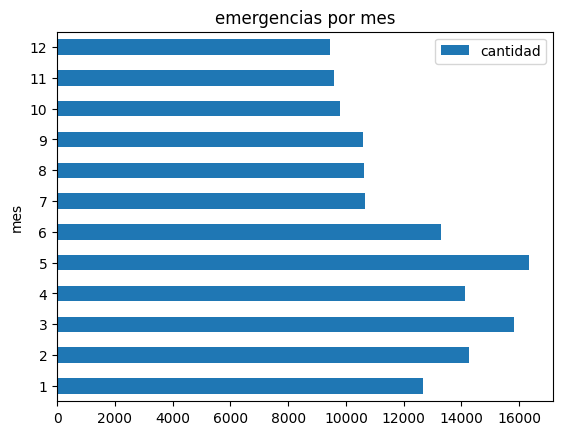

In [55]:
# Primero veamos las emergencias por mes.
montly_emergencies = df.groupby(['mes']).size().reset_index(name='cantidad')
montly_emergencies.plot(kind='barh', x='mes', y='cantidad', title='emergencias por mes')

<Axes: title={'center': 'emergencias por año'}, ylabel='ano'>

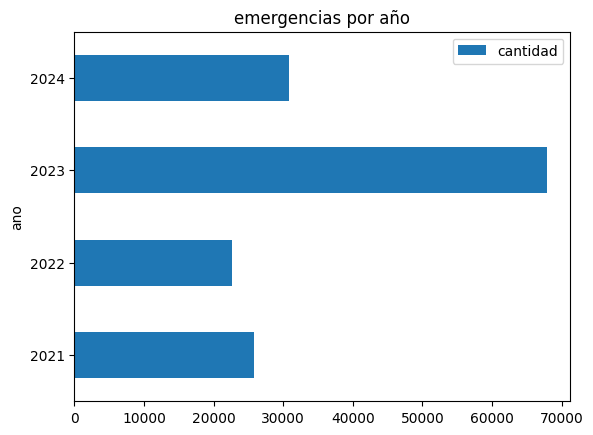

In [56]:
# Ahora las emergencias por ano

year_emergencies = df.groupby(['ano']).size().reset_index(name='cantidad')
year_emergencies.plot(kind='barh', x='ano', y='cantidad', title='emergencias por año')

<Axes: title={'center': 'emergencias por dia'}, ylabel='dia_semana'>

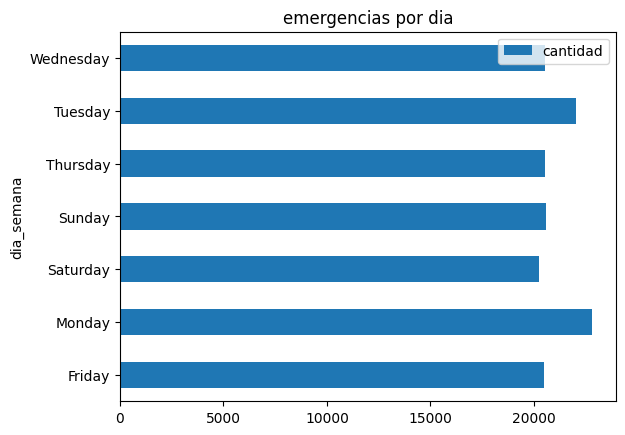

In [57]:
# Cual es el dia de la semana con mayor cantidad de emergencias?
daily_emergencies = df.groupby(['dia_semana']).size().reset_index(name='cantidad')
daily_emergencies.plot(kind='barh', x='dia_semana', y='cantidad', title='emergencias por dia')

In [58]:
# Sort the DataFrame by 'cantidad' in descending order
daily_emergencies = daily_emergencies.sort_values(by='cantidad', ascending=False)

# Get the top 3 rows
top_3_days = daily_emergencies.head(3)

# Print the top 3 days
top_3_days

,dia_semana,cantidad
1,Monday,22817
5,Tuesday,22014
3,Sunday,20588


### Distribución de Emergencias:
- **Emergencias por Especialidad**: Visualizar el número de emergencias atendidas por cada especialidad (ESPECIALIDAD) para comprender la demanda en cada área.
- **Emergencias por Género y Edad**: Utilizar las columnas GENERO y EDAD para analizar la distribución de las emergencias por sexo y grupos de edad, lo que puede revelar patrones interesantes.
- **Emergencias por Nacionalidad**: Si la columna NACIONALIDAD está disponible, se puede explorar la procedencia de los pacientes.

### Emergencias por Especialidad

In [59]:
eme_por_especialidad = df.groupby(['especialidad']).size().reset_index(name='cantidad')
eme_por_especialidad.sort_values(by='cantidad', ascending=False)

,especialidad,cantidad
4,Pediatria,38125
3,Medicina Interna,28372
6,Triaje,26064
1,Cirugia General,23762
2,Ginecologia,22010
0,911,6072
5,Trauma Shock,1944
7,Triaje Pediatrico,872


<Axes: title={'center': 'Emergencias por Especialidad'}, xlabel='especialidad'>

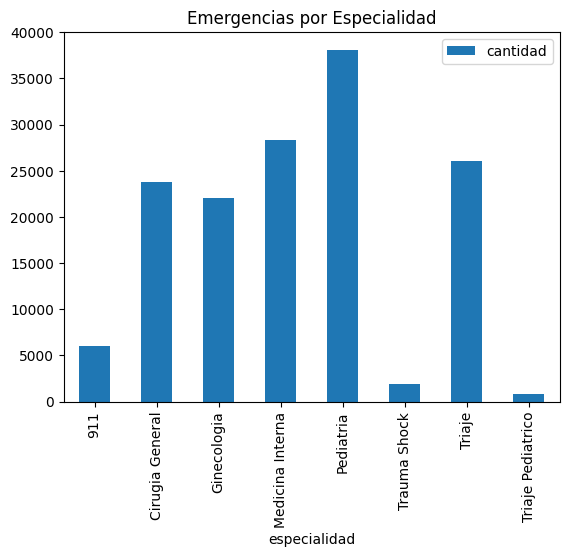

In [60]:
eme_por_especialidad.plot(kind='bar', x='especialidad', y='cantidad', title='Emergencias por Especialidad')

### Distribución de edad y sexo de los pacientes


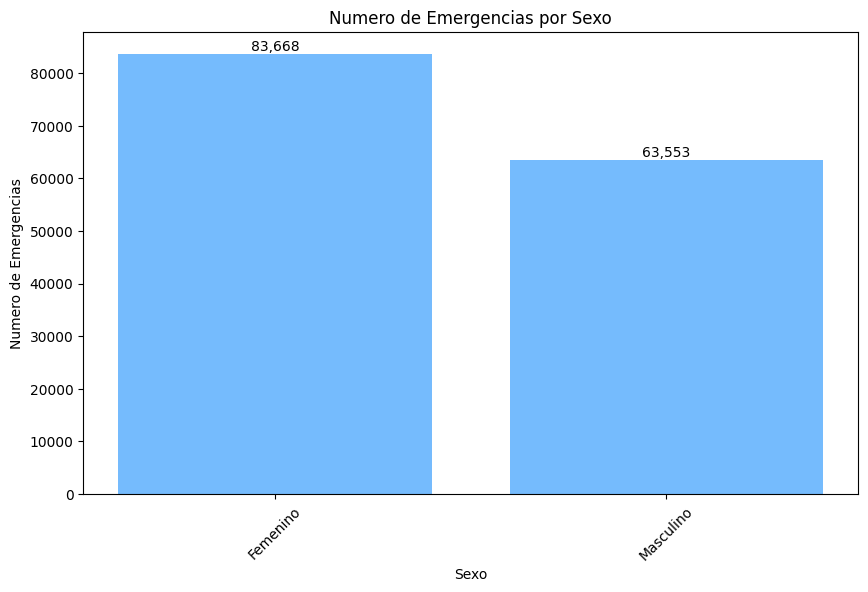

In [61]:
# Group by sex and count the number of emergencies
accidents_by_sex = df['sexo'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(accidents_by_sex.index, accidents_by_sex.values, color='xkcd:sky blue')
ax.set_xlabel('Sexo')
ax.set_ylabel('Numero de Emergencias')
ax.set_title('Numero de Emergencias por Sexo')
ax.set_xticklabels(accidents_by_sex.index, rotation=45)
ax.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

### ¿Qué nacionalidades son más frecuentes en las emergencias?


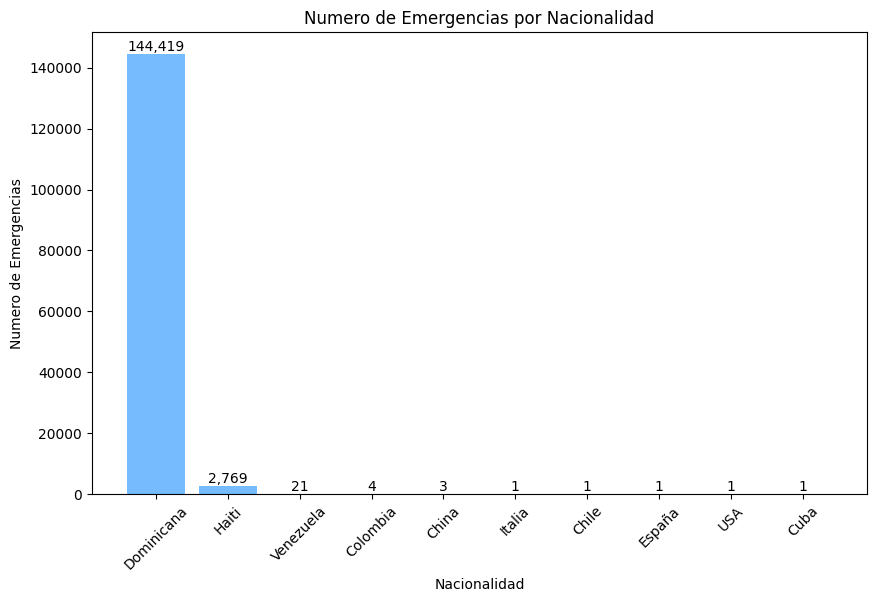

In [62]:
# Group by nationality and count the number of accidents
accidents_by_nationality = df['nacionalidad'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(accidents_by_nationality.index, accidents_by_nationality.values, color='xkcd:sky blue')
ax.set_xlabel('Nacionalidad')
ax.set_ylabel('Numero de Emergencias')
ax.set_title('Numero de Emergencias por Nacionalidad')
ax.set_xticklabels(accidents_by_nationality.index, rotation=45)
ax.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

### La República Dominicana enfrenta un desafío significativo con respecto a los embarazos en adolescentes. A continuación, realizaremos un análisis detallado de esta sección del conjunto de datos.

In [63]:
# Obtenemos las nacionaldiades
nacionalidades = df['nacionalidad'].unique()

# Agrupamos por 'nacionalidad' donde 'otras_especificar' es 'Embarazo' y contamos las occurencias
df[df['otras_especificar'] == 'Embarazo'].groupby(by='nacionalidad').size()

nacionalidad
Colombia          1
Dominicana    12772
Haiti           275
Venezuela         1
dtype: int64

In [64]:
# Categorizamos las edades de los pacientes (binning)
bins = [0, 3, 6, 12, 18, 35, 55, 75, 120]
labels = ['Infantes', 'Niños pequeños', 'Niños', 'Adolescentes', 'Jovenes adultos', 'Adultos de mediana edad', 'Adultos mayores', 'Ancianos']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

df.sample(10)

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad,dia,mes,ano,dia_semana,grupo_edad
140403,2024-05-20,Dominicana,61,Femenino,Enfermedad Diarreica Aguda,Eda,Estabilizados Y Despachados,Triaje,20,5,2024,Monday,Adultos mayores
66311,2023-04-09,Dominicana,25,Femenino,Emergecia Obstetrica,Embarazada,Estabilizados Y Despachados,Ginecologia,9,4,2023,Sunday,Jovenes adultos
141546,2024-05-26,Dominicana,36,Masculino,Sintomas neurológicos,Cefalea,Estabilizados Y Despachados,Triaje,26,5,2024,Sunday,Adultos de mediana edad
67446,2023-04-14,Dominicana,57,Femenino,Otros,Intoxicacion Etilica,Estabilizados Y Despachados,Medicina Interna,14,4,2023,Friday,Adultos mayores
62301,2023-03-18,Dominicana,63,Femenino,Dolor,Dolor Toracico,Estabilizados Y Despachados,Medicina Interna,18,3,2023,Saturday,Adultos mayores
68883,2023-04-21,Dominicana,49,Femenino,Otros,Crisis De Ansiedad,Estabilizados Y Despachados,Medicina Interna,21,4,2023,Friday,Adultos de mediana edad
141498,2024-05-26,Dominicana,4,Femenino,Otros,Incerto Cuerpo Extraño,Estabilizados Y Despachados,Pediatria,26,5,2024,Sunday,Niños pequeños
67497,2023-04-15,Dominicana,22,Masculino,Trauma General,Herida Antebrazo Izq,Estabilizados Y Despachados,Cirugia General,15,4,2023,Saturday,Jovenes adultos
4101,2021-07-28,Dominicana,21,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,28,7,2021,Wednesday,Jovenes adultos
108564,2023-11-19,Dominicana,68,Femenino,Dolor,Dolor De Pecho,Estabilizados Y Despachados,911,19,11,2023,Sunday,Adultos mayores


In [65]:
emergencias_por_grupo = df.groupby(['grupo_edad'])['grupo_edad'].count().reset_index(name='cantidad').sort_values(['cantidad'], ascending=False)
emergencias_por_grupo

,grupo_edad,cantidad
4,Jovenes adultos,51862
5,Adultos de mediana edad,25688
6,Adultos mayores,15321
2,Niños,13889
0,Infantes,12030
3,Adolescentes,11658
1,Niños pequeños,10932
7,Ancianos,5841


<Axes: title={'center': 'Emergencias por Grupo de Edad'}, xlabel='Grupo de Edad', ylabel='Cantidad'>

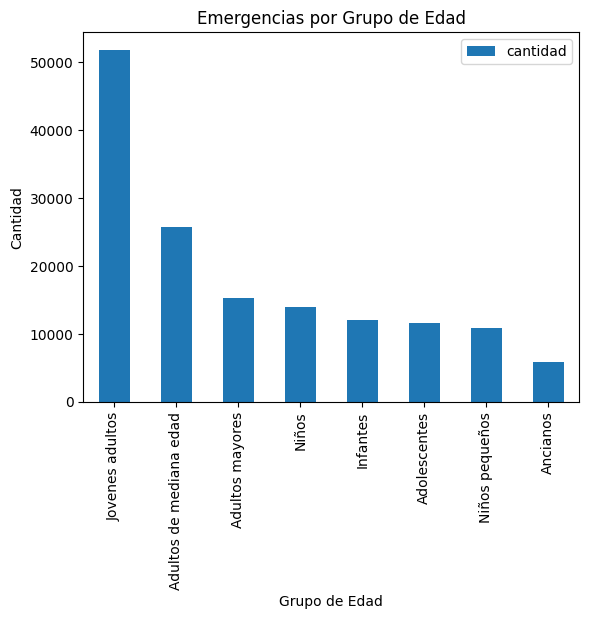

In [66]:
emergencias_por_grupo.plot(kind='bar', x='grupo_edad', y='cantidad', title='Emergencias por Grupo de Edad', xlabel='Grupo de Edad', ylabel="Cantidad")


In [67]:
df[df['otras_especificar'] == 'Embarazo'].groupby(by='grupo_edad').count()

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad,dia,mes,ano,dia_semana
grupo_edad,,,,,,,,,,,,
Infantes,2,2,2,2,2,2,2,2,2,2,2,2
Niños pequeños,1,1,1,1,1,1,1,1,1,1,1,1
Niños,5,5,5,5,5,5,5,5,5,5,5,5
Adolescentes,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527
Jovenes adultos,10379,10379,10379,10379,10379,10379,10379,10379,10379,10379,10379,10379
Adultos de mediana edad,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
Adultos mayores,38,38,38,38,38,38,38,38,38,38,38,38
Ancianos,2,2,2,2,2,2,2,2,2,2,2,2


In [68]:
## embarazos adultos mayores
df.query("otras_especificar == 'Embarazo' and edad >= 10 and edad <= 55").sort_values(by="edad")

,fecha,nacionalidad,edad,sexo,diagnostico_causa,otras_especificar,evolucion,especialidad,dia,mes,ano,dia_semana,grupo_edad
138941,2024-05-13,Dominicana,10,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,13,5,2024,Monday,Niños
123686,2024-02-11,Dominicana,10,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,11,2,2024,Sunday,Niños
12123,2021-09-14,Dominicana,10,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,14,9,2021,Tuesday,Niños
30221,2022-02-11,Dominicana,11,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,11,2,2022,Friday,Niños
131708,2024-03-29,Dominicana,12,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,29,3,2024,Friday,Adolescentes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102265,2023-10-18,Dominicana,54,Femenino,Emergecia Obstetrica,Embarazo,Hospitalizados,Ginecologia,18,10,2023,Wednesday,Adultos de mediana edad
62953,2023-03-22,Dominicana,54,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,22,3,2023,Wednesday,Adultos de mediana edad
8611,2021-08-25,Dominicana,54,Femenino,Emergecia Obstetrica,Embarazo,Hospitalizados,Ginecologia,25,8,2021,Wednesday,Adultos de mediana edad
15550,2021-10-10,Dominicana,55,Femenino,Emergecia Obstetrica,Embarazo,Estabilizados Y Despachados,Ginecologia,10,10,2021,Sunday,Adultos mayores


In [69]:
# df.query("grupo_edad == 'Adolescentes' and otras_especificar == 'Embarazo'").sort_values(by="edad")

### El Hospital Vinicio Calventi registró un total de **13,049** emergencias relacionadas con embarazos durante el período 2021-2024, de las cuales **1,527 correspondieron a adolescentes y 5 a niñas**, sumando un total de **1,532** embarazos.

In [70]:
# Veamos cual fue la evolucion de esos pacientes.
adolescentes_embarazadas = df.query("grupo_edad == 'Adolescentes' and otras_especificar == 'Embarazo'").sort_values(by="evolucion")

adolescentes_embarazadas['evolucion'].value_counts()

evolucion
Estabilizados Y Despachados    1161
Hospitalizados                  366
Name: count, dtype: int64

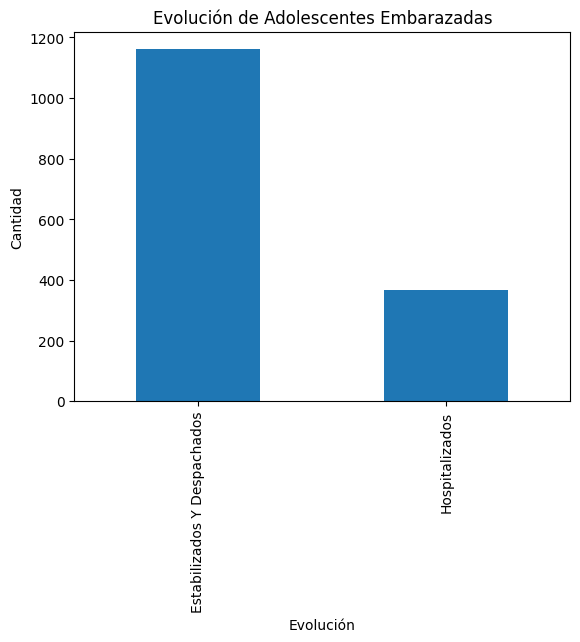

In [71]:
import matplotlib.pyplot as plt

adolescentes_embarazadas['evolucion'].value_counts().plot(kind='bar')
plt.title('Evolución de Adolescentes Embarazadas')
plt.xlabel('Evolución')
plt.ylabel('Cantidad')
plt.show()

### Emergencias 911:
- **Proporción de Emergencias 911**: Mostrar el porcentaje de emergencias que llegan a través del 911 (911) en comparación con otras fuentes.
- **Análisis de Causas de Emergencias 911**: Si la columna CAUSA está disponible y es relevante para las emergencias 911, se puede analizar las causas más comunes de estas emergencias.

In [72]:
es_na = df['especialidad'].isna() is True
es_na

False

In [73]:
es_911 = df['especialidad'] == '911'
es_911

0          True
1          True
2          True
3          True
4          True
          ...  
147364    False
147365    False
147366    False
147367    False
147368     True
Name: especialidad, Length: 147221, dtype: bool

In [74]:
porcentage_911 = es_911.mean() * 100
porcentage_911

4.124411598888746

In [75]:
# the causes of the 911 emergencies

df_911 = df[df['especialidad'] == '911']
causas_911 = df_911['diagnostico_causa'].value_counts()
causas_911

diagnostico_causa
Otros                          2596
Dolor                          1345
Trauma General                 1082
Hipertension Arterial Alta      298
Crisis Convulsivas              142
Sintomas neurológicos           139
Crisis Diabetica                 82
Emergecia Obstetrica             69
Traumas Accidentes Tránsito      58
Sintomas respiratorios           56
Crisis de Broncoespasmo          49
Crisis Psiquiátrica              43
Enfermedad Cerebro Vascular      29
Sindrome Febril                  25
Emergencia Ginecológica          19
Intoxicacion Alimetaria          14
Enfermedad Diarreica Aguda       10
Dolor Torácico                    8
Cefalea                           4
Traumas Armas Blancas             4
Name: count, dtype: int64

<Axes: title={'center': 'Causas de Emergencias 911'}, xlabel='diagnostico_causa'>

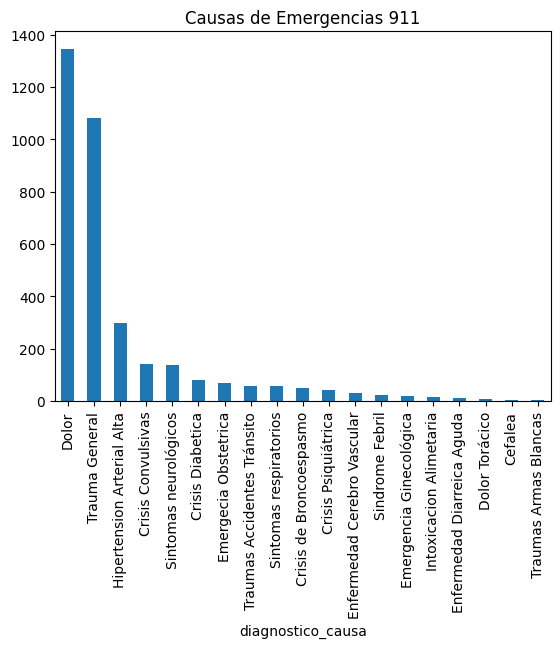

In [76]:
# Veamos un grafico de las emergencias 911 sin la columna "otros"

causas_911.drop('Otros', inplace=True)
causas_911.plot(kind='bar', title='Causas de Emergencias 911')

In [77]:
# check the relationship in the dominican patients by age and most frecuent causes of emergencies

df_dom = df[df['nacionalidad'] == 'Dominicana'] 
df_dom.head()

# now let's check the relationship by age and most frecuent cause of emergencies and get only top 3 causes by age group

df_dom.groupby(by='grupo_edad')['diagnostico_causa'].value_counts().groupby(level=0).head(3)

grupo_edad               diagnostico_causa      
Infantes                 Otros                       5093
                         Sindrome Febril             2725
                         Crisis de Broncoespasmo     1551
Niños pequeños           Otros                       4265
                         Sindrome Febril             2721
                         Trauma General              1548
Niños                    Otros                       4717
                         Sindrome Febril             3077
                         Trauma General              2800
Adolescentes             Otros                       3267
                         Trauma General              2308
                         Emergecia Obstetrica        2082
Jovenes adultos          Emergecia Obstetrica       15168
                         Otros                      13237
                         Trauma General              8642
Adultos de mediana edad  Otros                      10117
                       

### Encontremos a nuestro paciente mas comun

In [78]:
# find the most common patient

cols = df.columns
cols

patient = []

for col in cols:
    mode_col = df[col].mode()[0]
    patient.append(mode_col)

patient
    

[Timestamp('2023-02-01 00:00:00'),
 'Dominicana',
 1,
 'Femenino',
 'Otros',
 'Embarazo',
 'Estabilizados Y Despachados',
 'Pediatria',
 1,
 5,
 2023,
 'Monday',
 'Jovenes adultos']

Preguntas a Considerar:

    ¿Cuál es el perfil demográfico de los pacientes atendidos en el hospital?
    ¿Cuáles son las enfermedades más frecuentes?
    ¿Existen diferencias en la atención médica según el género, la edad o el seguro médico?
    ¿Cuáles son los factores asociados a una mayor duración de la estancia hospitalaria?
    ¿Hay diferencias en los resultados clínicos entre diferentes tratamientos o procedimientos?

**Deeper analysis of patient demographics:** Explore the relationship between nationality, age, and the most frequent diagnoses or causes of emergencies. This can reveal potential health disparities or specific needs of certain demographic groups.

**Time series analysis:** Analyze the trends and seasonality of different types of emergencies over time. This could involve decomposing the time series to identify underlying patterns and potentially forecast future emergency volumes.

**Correlation analysis:** Investigate potential correlations between different variables, such as age, gender, nationality, diagnosis, and evolution. This can help identify risk factors or relationships between different health conditions.

**Geographical mapping:** If location data is available or can be inferred, visualize emergency locations on a map to identify hotspots and potential areas for targeted interventions.

**Comparative analysis:** If you have access to data from other hospitals or regions, compare emergency trends and demographics across different locations to identify variations and potential best practices.

**Machine learning:** Explore the possibility of using machine learning models to predict patient outcomes (e.g., hospitalization or discharge) based on their demographics, diagnosis, and other factors. This could potentially aid in resource allocation and triage decisions.

**Focus on specific conditions:** Conduct a more in-depth analysis of specific health issues, such as the high prevalence of adolescent pregnancies. This could involve exploring contributing factors, outcomes, and potential interventions.